In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
main_path = '/home/kevin/DNA-Methylation-patterns/'
inpath_processing = main_path + 'Datasetb37_bismark/downstream/'
outpath_processing = main_path + 'Datasetb37_bismark/downstream/'
region = "NDRs"
NOR_NDR_file = outpath_processing + 'NOMe_{}_intersect.bed'.format(region[:-1])

In [26]:

column_names = ["refid", "gene_name", "chrom", "promoter_start", "promoter_end", "TSS", "TES",
                    "strand", "nuc_region_start_genome", "nuc_region_end_genome", "nuc_start_promo_abs", 
                    "nuc_end_promo_abs", "nuc_start_promo_rel", "nuc_end_promo_rel", "region_length"]

info_dict = dict()
for col in column_names:
    info_dict[col] = []

with open(NOR_NDR_file) as f:
    reader = csv.reader(f, delimiter ='\t')
    for line_s in reader:
        chrom = line_s[0]            
        promo_start = int(line_s[1])
        promo_end = int(line_s[2])
        refid = line_s[3]
        gene_name = line_s[4]
        TSS = int(line_s[5])
        TES = int(line_s[6])
        strand = line_s[7]
        nuc_region_start = int(line_s[9])
        nuc_region_end = int(line_s[10])

        if nuc_region_start >= promo_start and nuc_region_end <= promo_end:    
            if strand == "+":
                promo_abs_start = nuc_region_start - promo_start
                promo_abs_end = nuc_region_end - promo_start
                
            if strand == "-":
                # promo_abs_end = promo_end - nuc_region_start
                # promo_abs_start = promo_end - nuc_region_end
                promo_abs_end = promo_end - nuc_region_start
                promo_abs_start = promo_end - nuc_region_end

            rel_start = promo_abs_start - 2000
            rel_end = promo_abs_end - 2000

            info_dict["chrom"].append(chrom)
            info_dict["promoter_start"].append(promo_start)
            info_dict["promoter_end"].append(promo_end)
            info_dict["refid"].append(refid)
            info_dict["gene_name"].append(gene_name)
            info_dict["TSS"].append(TSS)
            info_dict["TES"].append(TES)
            info_dict["strand"].append(strand)
            
            info_dict["nuc_region_start_genome"].append(nuc_region_start)
            info_dict["nuc_region_end_genome"].append(nuc_region_end)
            
            info_dict["nuc_start_promo_abs"].append(promo_abs_start)
            info_dict["nuc_end_promo_abs"].append(promo_abs_end)
            
            info_dict["nuc_start_promo_rel"].append(rel_start)
            info_dict["nuc_end_promo_rel"].append(rel_end)
            
            info_dict["region_length"].append(rel_end-rel_start)

        
# Built dataframe
df = pd.DataFrame(0, index = np.arange(len(info_dict["refid"])), columns = column_names)
for feat in column_names:
    df[feat] = info_dict[feat]  
    
df = df.sort_values(by = ['chrom', 'promoter_start'], ascending=[True, True])

In [27]:
df.head()

,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,nuc_region_start_genome,nuc_region_end_genome,nuc_start_promo_abs,nuc_end_promo_abs,nuc_start_promo_rel,nuc_end_promo_rel,region_length
0,NM_001385641.1,SAMD11,chr1,857302,860302,859302,879954,+,857464,857471,162,169,-1838,-1831,7
1,NM_001385641.1,SAMD11,chr1,857302,860302,859302,879954,+,858788,858798,1486,1496,-514,-504,10
2,NM_015658.4,NOC2L,chr1,893636,896636,879582,894636,-,893907,893948,2688,2729,688,729,41
3,NM_015658.4,NOC2L,chr1,893636,896636,879582,894636,-,894132,894146,2490,2504,490,504,14
4,NM_015658.4,NOC2L,chr1,893636,896636,879582,894636,-,894205,894320,2316,2431,316,431,115


In [28]:
df.shape

(50567, 15)

In [29]:
# df = df[df['region_length']>147]

In [30]:
df = df[df['nuc_start_promo_rel'] < 0]

In [31]:
# df = df[df['strand']=='+']

In [32]:
df.head()

,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,nuc_region_start_genome,nuc_region_end_genome,nuc_start_promo_abs,nuc_end_promo_abs,nuc_start_promo_rel,nuc_end_promo_rel,region_length
0,NM_001385641.1,SAMD11,chr1,857302,860302,859302,879954,+,857464,857471,162,169,-1838,-1831,7
1,NM_001385641.1,SAMD11,chr1,857302,860302,859302,879954,+,858788,858798,1486,1496,-514,-504,10
5,NM_198317.3,KLHL17,chr1,893963,896963,895963,901099,+,894132,894146,169,183,-1831,-1817,14
6,NM_198317.3,KLHL17,chr1,893963,896963,895963,901099,+,894205,894320,242,357,-1758,-1643,115
7,NM_001369897.1,PERM1,chr1,916473,919473,910577,917473,-,918762,918806,667,711,-1333,-1289,44


In [33]:
rel_starts = list(df["nuc_start_promo_rel"])
rel_ends = list(df["nuc_end_promo_rel"])
region_length = list(df["region_length"])

# refids = set(list(df_inter["refid"])

/tmp/ipykernel_40374/3668928058.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rel_starts,color="#D35400",kde_kws={"linewidth":3},label = "Start positions")   #bins=50    region.replace("s","") +" starts"
/tmp/ipykernel_40374/3668928058.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

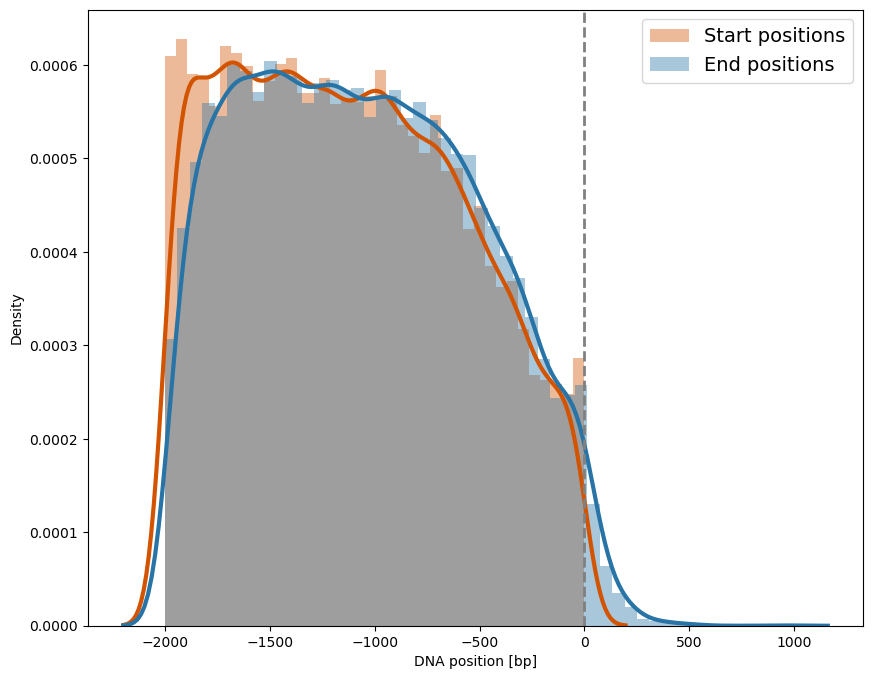

In [34]:
size_plot = 18
axis_font = {'fontname':'Arial', 'size':str(size_plot)}

inter_start = -2000
inter_end = 1000
step = 200
inter = range(inter_start,inter_end+1,step)

plt.figure(num=None, figsize=(10, 8), facecolor='w', edgecolor='k')
ax = plt.subplot(1,1,1)

sns.distplot(rel_starts,color="#D35400",kde_kws={"linewidth":3},label = "Start positions")   #bins=50    region.replace("s","") +" starts"
sns.distplot(rel_ends,color="#2874A6",kde_kws={"linewidth":3},label = "End positions")  #region.replace("s","")+" ends"
# plt.hist(rel_starts, bins = 100 ,label = "Start positions")   #bins=50    region.replace("s","") +" starts"
# plt.hist(rel_ends,bins = 100, label = "End positions")  #region.replace("s","")+" ends"

plt.xlabel("DNA position [bp]")
plt.ylabel("Density")
plt.legend(frameon=1,prop={'size':14})

# plt.xlim(-1000000,1000000)
#plt.xticks(inter)
plt.xticks(range(-2000,1001,500))
plt.axvline(x=0,linestyle='dashed',linewidth=2,color='grey')

plt.show()


/tmp/ipykernel_40374/298873366.py:4: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  zed = [tick.label.set_fontsize(size_plot) for tick in ax.yaxis.get_major_ticks()]
/tmp/ipykernel_40374/298873366.py:5: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  zed = [tick.label.set_fontsize(size_plot) for tick in ax.xaxis.get_major_ticks()]
/tmp/ipykernel_40374/298873366.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(region_length,kde_kws={"linewidth":3},color="grey")  

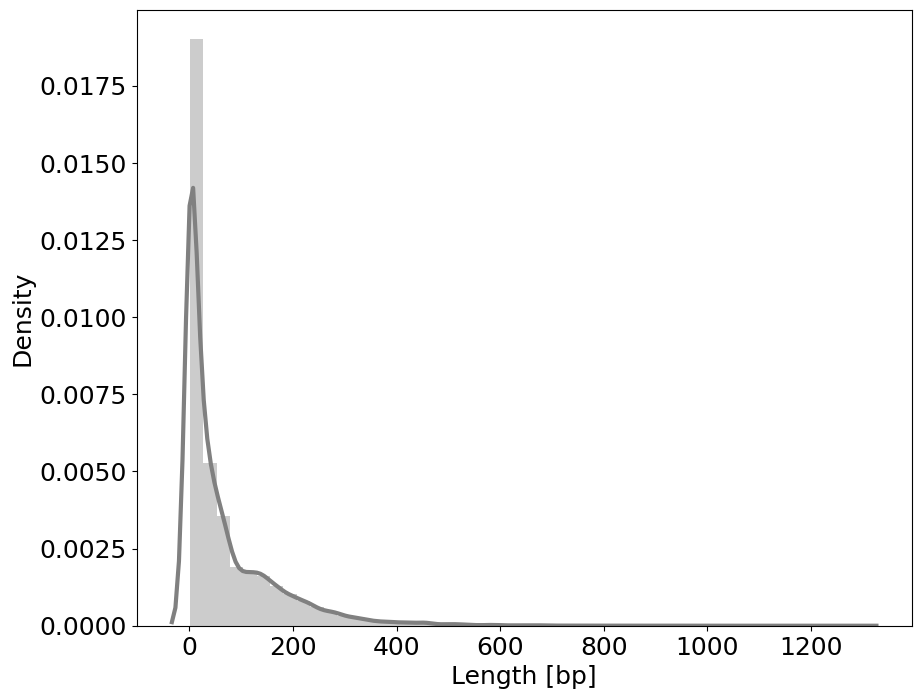

In [35]:
plt.figure(num=None, figsize=(10, 8), facecolor='w', edgecolor='k')
ax = plt.subplot(1,1,1)

zed = [tick.label.set_fontsize(size_plot) for tick in ax.yaxis.get_major_ticks()]
zed = [tick.label.set_fontsize(size_plot) for tick in ax.xaxis.get_major_ticks()]

sns.distplot(region_length,kde_kws={"linewidth":3},color="grey")   #bins=50

plt.xlabel("Length [bp]",**axis_font)
plt.ylabel("Density",**axis_font)

# plt.xlim(0,2000)
# plt.xticks(range(0,2000,200))

plt.show()